**Carinsurancclaim_DATASET_3**

In [1]:
#Mount the data from cloud (I have used Google colab as my Jupyternote was crashing most of the time)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#importing important libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


import seaborn as sns
import matplotlib.pyplot  as plt

In [3]:
#read the data set from the CSV file
df=pd.read_csv('/content/gdrive/My Drive/DMML/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [5]:
#check if there are any null value in the data set
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

**EDA and Feature Engineering **

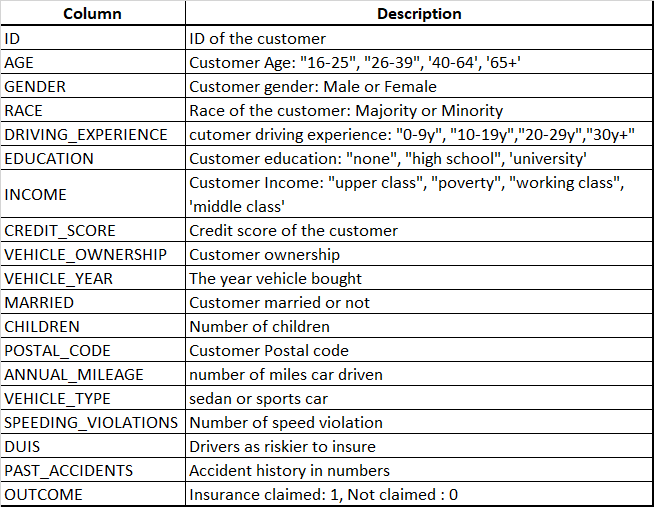

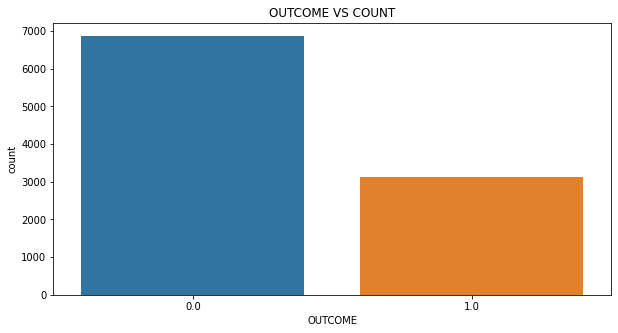

In [6]:
#not claimed are 50% more than the claimed persons it seems the target variable is imbalanced 
plt.figure(figsize=(10,5))
plt.title('OUTCOME VS COUNT')
sns.countplot(data=df, x ='OUTCOME');

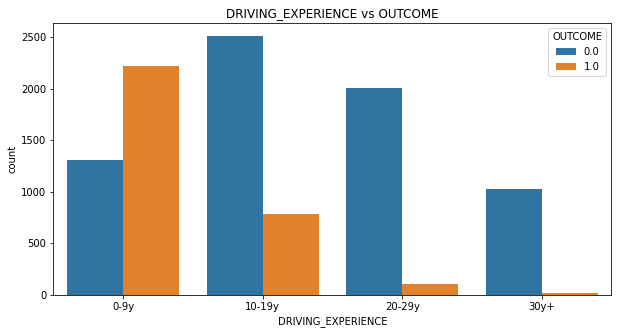

In [7]:
#count vs driving experience along with less years of experieced are more likely to claim
plt.figure(figsize=(10,5))
plt.title('DRIVING_EXPERIENCE vs OUTCOME')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME');

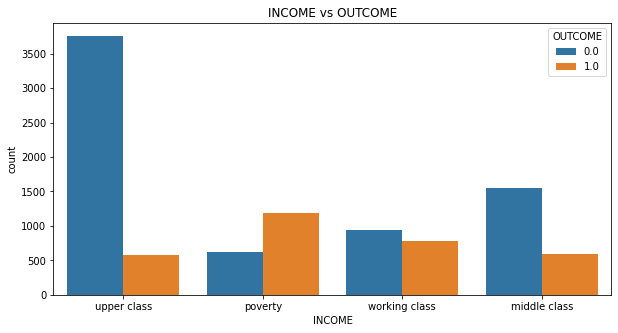

In [8]:
#poverty count are more likely to claim
plt.figure(figsize=(10,5))
plt.title('INCOME vs OUTCOME')
sns.countplot(data=df, x ='INCOME', hue='OUTCOME');

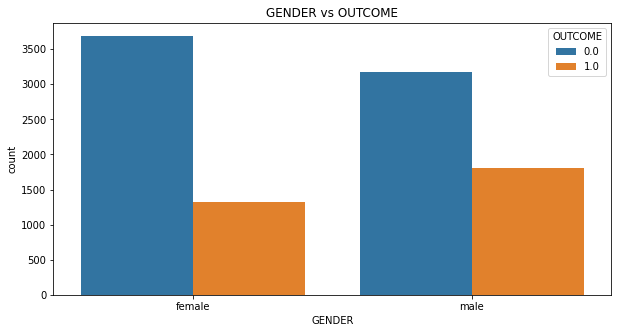

In [9]:
#men are more likely to claim for insurance compare to women
plt.figure(figsize=(10,5))
plt.title('GENDER vs OUTCOME')
sns.countplot(data=df, x ='GENDER', hue='OUTCOME');

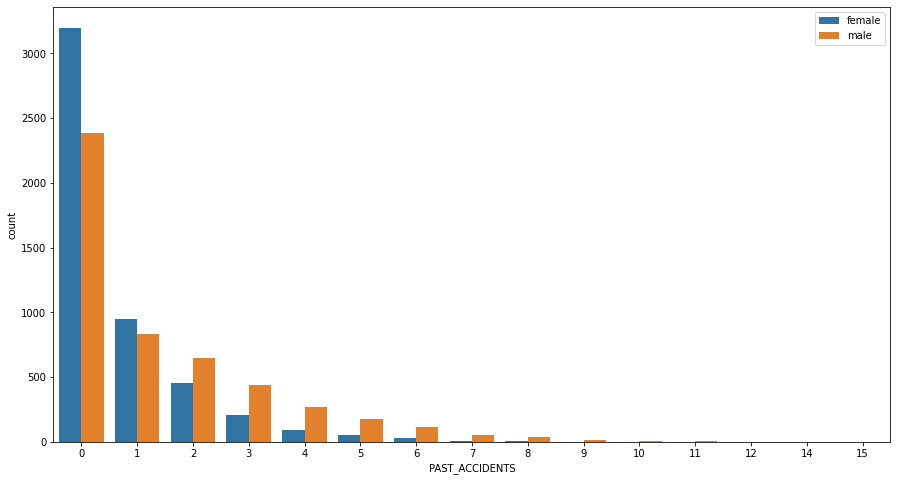

In [10]:
# number of accidents vs count is plotted to check for insights
plt.figure(figsize=(15,8))
sns.countplot(x='PAST_ACCIDENTS',data=df,hue='GENDER')
plt.legend(loc=1)

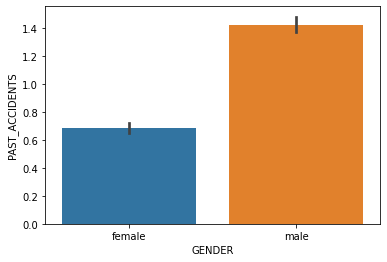

In [11]:
# accident vs gender bar plot is plotted to check the insights
# men are more likely to commit accident than women, form the graph ratio found to be close to 100:50 for men and women respectfully 

sns.barplot(x='GENDER',y='PAST_ACCIDENTS',data=df)

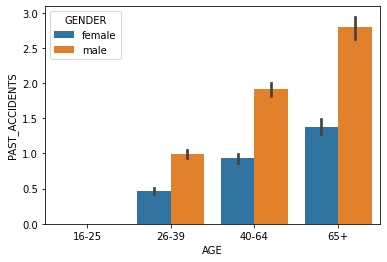

In [12]:
sns.barplot(x='AGE',y='PAST_ACCIDENTS',data=df,hue='GENDER',order = ['16-25','26-39','40-64','65+'])

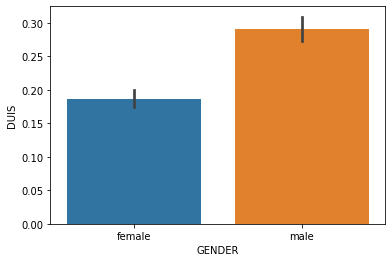

In [13]:
sns.barplot(x='GENDER',y='DUIS',data=df)

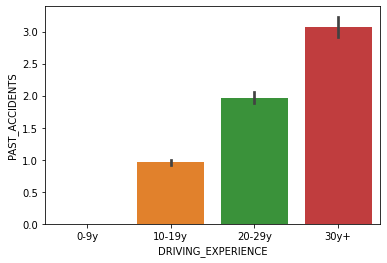

In [14]:
sns.barplot(x='DRIVING_EXPERIENCE',y='PAST_ACCIDENTS',data=df)

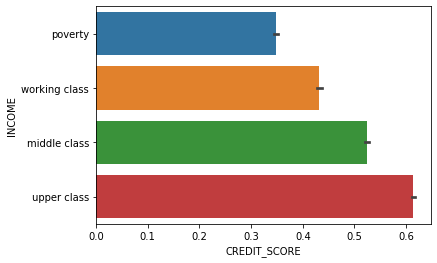

In [15]:
sns.barplot(x='CREDIT_SCORE',y='INCOME',data=df,order=["poverty",'working class','middle class',"upper class"])

**Data Cleaning**

In [16]:
#check if there are any null value in the data set
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [17]:
#first we drop ID Not impt
df=df.drop(["ID"],axis=1)

In [18]:
#find the duplicate values in the data
df.duplicated().sum()

12

In [19]:
#drop the duplicated preset in the dataset
df=df.drop_duplicates()

In [20]:
# since we have less data we fill the credit score and annual milage column values 

In [21]:
'''To fill the credit card score we use income 
column catregories in that we take the four catogories median''' 

#group by income category upper class and take out median of it credit score.
upper_class_median = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].median()
#group by income category middle class and take out median of it credit score.
middle_class_median = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].median()
#group by income category poverty  and take out median of it credit score.
poverty_class_median = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].median()
#group by income category working class  and take out median of it credit score.
working_class_median = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].median()

In [22]:
#by applying the  condition we group the credit score category working class  and fill the na values with the median 
df.loc[(df[(df['INCOME'] == 'working class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].fillna(working_class_median)
#by applying the  condition we group the credit score category poverty  and fill the na values with the median 
df.loc[(df[(df['INCOME'] == 'poverty') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].fillna(poverty_class_median)
#by applying the  condition we group the credit score category middle class  and fill the na values with the median 
df.loc[(df[(df['INCOME'] == 'middle class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].fillna(middle_class_median)
#by applying the  condition we group the credit score category upper class and fill the na values with the median 
df.loc[(df[(df['INCOME'] == 'upper class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].fillna(upper_class_median)

In [23]:
# we fill the annual milage null values with normal median
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [24]:
#check for the null values, no null values found
df.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [25]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.00000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,0.515593,0.697537,0.498698,0.689327,19873.85873,11723.768522,1.484581,0.239487,1.057369,0.312775
std,0.134649,0.459348,0.500023,0.462792,18923.83540,2681.536045,2.242766,0.555262,1.653047,0.463647
min,0.053358,0.000000,0.000000,0.000000,10238.00000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421746,0.000000,0.000000,0.000000,10238.00000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.526747,1.000000,0.000000,1.000000,10238.00000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.616289,1.000000,1.000000,1.000000,32765.00000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.00000,22000.000000,22.000000,6.000000,15.000000,1.000000


In [26]:
df.dtypes

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

**check for the outliers**

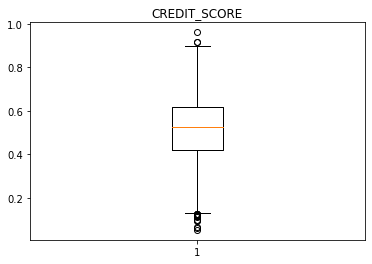

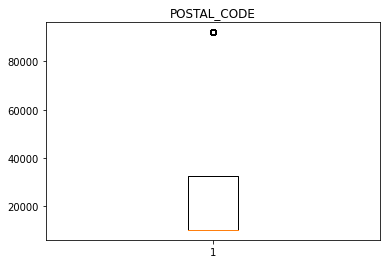

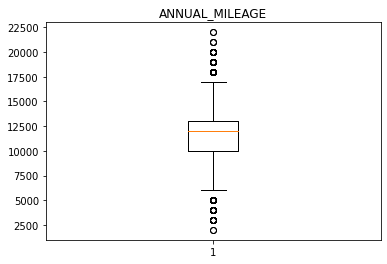

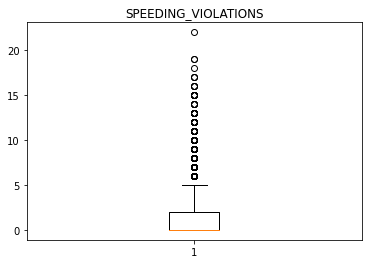

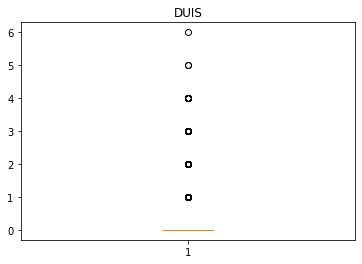

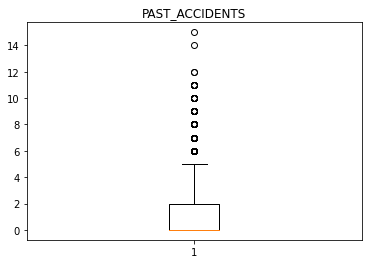

In [27]:
features = ['CREDIT_SCORE','POSTAL_CODE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']

for feature in features:
  plt.boxplot(df[feature])
  plt.title(feature)
  plt.show()

In [28]:

#as we have less data we trim the values seeing the box plot remove outliers 324 values removed
df=df[~(df["ANNUAL_MILEAGE"]>=17500)]
df=df[~(df["ANNUAL_MILEAGE"]<=5000)]
df=df[~(df["SPEEDING_VIOLATIONS"]>=15)]
df=df[~(df["DUIS"]>=5)]
df=df[~(df["PAST_ACCIDENTS"]>=10)]

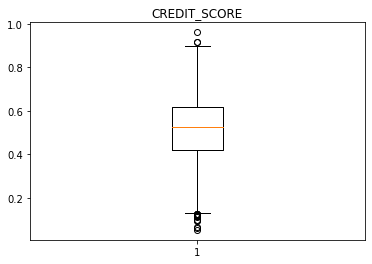

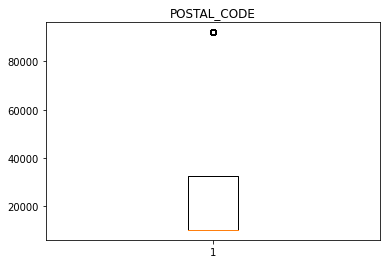

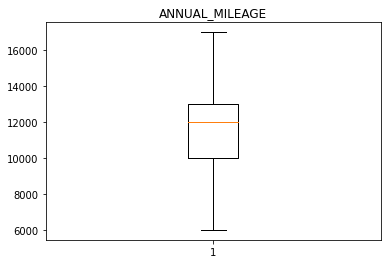

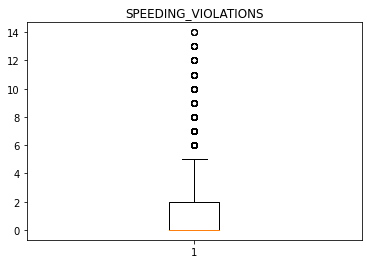

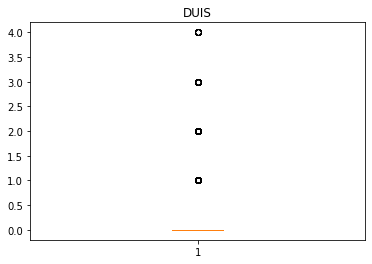

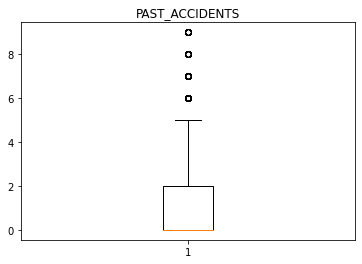

In [29]:
features = ['CREDIT_SCORE','POSTAL_CODE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']

for feature in features:
  plt.boxplot(df[feature])
  plt.title(feature)
  plt.show()

In [30]:
#function call for encoding 
def Encoding(D_frame, columns):

    D_frame = D_frame.replace(columns)
    D_frame.head() 

    return D_frame

In [31]:
#we replace all the qualitative data with the numeric value
clean_data   = {"AGE":                  {"16-25": 1, "26-39": 2, '40-64': 3, '65+': 4},
                "GENDER":               {"female": 0, "male": 1},
                "RACE":                 {"minority": 0, "majority": 1 },
                "DRIVING_EXPERIENCE":   {"0-9y": 1, "10-19y": 2,"20-29y":3,"30y+":4},
                "EDUCATION":            {"none": 1, "high school": 2, 'university': 3},
                "INCOME":               {"upper class": 4, "poverty": 1, "working class": 2, 'middle class':3},
          "VEHICLE_YEAR":               {"after 2015": 1, "before 2015":0},
                "VEHICLE_TYPE":         {"sedan": 0, "sports car": 1},
}
      
df = Encoding( df, clean_data)

In [32]:
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4,0,1,1,2,4,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,1,1,1,1,1,1,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,1,0,1,1,2,2,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,1,1,1,1,3,2,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,2,1,1,2,1,2,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,1,2,3,4,0.582787,1.0,0,0.0,0.0,10238,16000.0,0,0,0,1,0.0
9996,2,0,1,2,1,3,0.522231,1.0,1,0.0,1.0,32765,12000.0,0,1,0,0,0.0
9997,2,1,1,1,2,3,0.470940,1.0,0,0.0,1.0,10238,14000.0,0,0,0,0,0.0
9998,2,0,1,2,2,1,0.364185,0.0,0,0.0,1.0,10238,13000.0,0,2,0,1,1.0


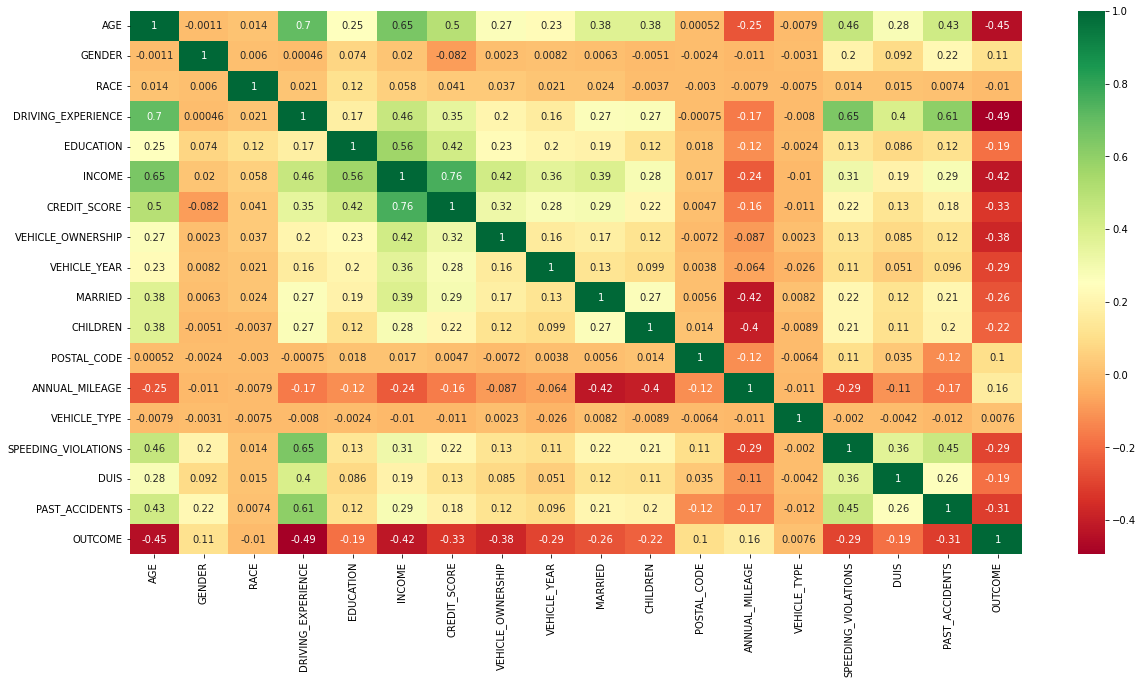

In [33]:
#we draw the correlation plot to check multicolineraity 
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))

#plot heatmap

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
list_Indpndt_features = [feature for feature in df.columns if 'OUTCOME' not in feature ]
list_Indpndt_features

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'VEHICLE_TYPE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [35]:
#VIF should be less than the 10 per gausian



import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =df[list_Indpndt_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[list_Indpndt_features].values, i)
                          for i in range(len(df[list_Indpndt_features].columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                feature        VIF
0                   AGE  20.268671
1                GENDER   2.324815
2                  RACE   9.186717
3    DRIVING_EXPERIENCE  19.026435
4             EDUCATION  14.577769
5                INCOME  30.815971
6          CREDIT_SCORE  33.856095
7     VEHICLE_OWNERSHIP   4.029117
8          VEHICLE_YEAR   1.650240
9               MARRIED   2.663648
10             CHILDREN   3.928122
11          POSTAL_CODE   2.132169
12       ANNUAL_MILEAGE  16.074179
13         VEHICLE_TYPE   1.049999
14  SPEEDING_VIOLATIONS   2.970137
15                 DUIS   1.450724
16       PAST_ACCIDENTS   2.545695


In [36]:
#Assumptions of Dependent and Independent Features
#The Independent features are Highly corelated with each other listing of those variables which are more than 0.5 correlating
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = df[list_Indpndt_features[i]].corr(df[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

AGE  &  DRIVING_EXPERIENCE  =  0.7028804261257406
AGE  &  INCOME  =  0.6516666048537609
AGE  &  CREDIT_SCORE  =  0.5024828547557428
DRIVING_EXPERIENCE  &  SPEEDING_VIOLATIONS  =  0.6456759605583483
DRIVING_EXPERIENCE  &  PAST_ACCIDENTS  =  0.605749854237892
EDUCATION  &  INCOME  =  0.5621250356616857
INCOME  &  CREDIT_SCORE  =  0.7601511294074481


In [37]:
df.dtypes

AGE                      int64
GENDER                   int64
RACE                     int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR             int64
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE             int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [38]:
# Categorical vaiables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']

cat_vars

[]

In [39]:
# Numeric variables
num_vars = [
    var for var in df.columns if var not in cat_vars 
]

num_vars

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'VEHICLE_TYPE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

In [40]:
discrete_vars = [var for var in num_vars if len(
    df[var].unique()) < 20 ]

print('Number of discrete variables: ', discrete_vars)

Number of discrete variables:  ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


In [41]:
# list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', cont_vars)

Number of continuous variables:  ['CREDIT_SCORE']


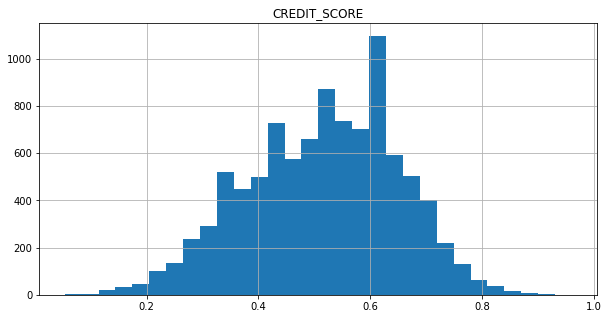

In [42]:
# histograms for all continuous variables 
# continous variable is normally distributed
df[cont_vars].hist(bins=30, figsize=(10,5))
plt.show()

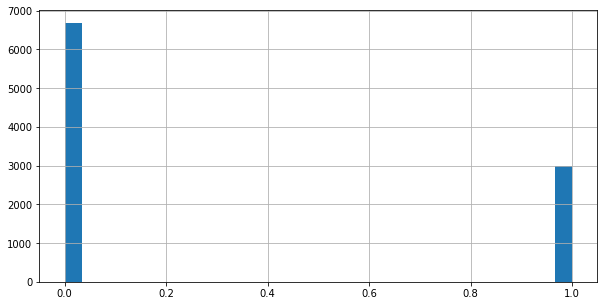

In [43]:
#outcome count
df['OUTCOME'].hist(bins=30, figsize=(10,5))
plt.show()

In [44]:
#removing unncecssary and less correlated columns from the data frame
df_1 = df.copy()
new_features=['POSTAL_CODE','RACE','VEHICLE_TYPE','ANNUAL_MILEAGE']
df_1=df_1.drop(columns=new_features, axis=1).copy()
df_1.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4,0,1,2,4,0.629027,1.0,1,0.0,1.0,0,0,0,0.0
1,1,1,1,1,1,0.357757,0.0,0,0.0,0.0,0,0,0,1.0
2,1,0,1,2,2,0.493146,1.0,0,0.0,0.0,0,0,0,0.0
3,1,1,1,3,2,0.206013,1.0,0,0.0,1.0,0,0,0,0.0
4,2,1,2,1,2,0.388366,1.0,0,0.0,0.0,2,0,1,1.0


In [45]:
list_Indpndt_features = [feature for feature in df_1.columns if 'OUTCOME' not in feature ]
list_Indpndt_features

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [46]:
#we again check for VIF score 
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =df_1[list_Indpndt_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[list_Indpndt_features].values, i)
                          for i in range(len(df_1[list_Indpndt_features].columns))]
  
print(vif_data)

                feature        VIF
0                   AGE  20.115862
1                GENDER   2.087832
2    DRIVING_EXPERIENCE  17.071217
3             EDUCATION  12.738985
4                INCOME  27.842878
5          CREDIT_SCORE  24.811832
6     VEHICLE_OWNERSHIP   3.994758
7          VEHICLE_YEAR   1.646485
8               MARRIED   2.509492
9              CHILDREN   3.848815
10  SPEEDING_VIOLATIONS   2.627712
11                 DUIS   1.444669
12       PAST_ACCIDENTS   2.370459


In [47]:
#Assumptions of Dependent and Independent Features
#Null Hypothesis 1 : - The Independent features are Highly corelated with each othe
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = df[list_Indpndt_features[i]].corr(df[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

AGE  &  DRIVING_EXPERIENCE  =  0.7028804261257406
AGE  &  INCOME  =  0.6516666048537609
AGE  &  CREDIT_SCORE  =  0.5024828547557428
DRIVING_EXPERIENCE  &  SPEEDING_VIOLATIONS  =  0.6456759605583483
DRIVING_EXPERIENCE  &  PAST_ACCIDENTS  =  0.605749854237892
EDUCATION  &  INCOME  =  0.5621250356616857
INCOME  &  CREDIT_SCORE  =  0.7601511294074481


In [48]:
#as age and driving experience and with other variables is heavly corelateed(>0.7) we just remove age for further analysis
new_features=['AGE']
df_1=df_1.drop(columns=new_features, axis=1).copy()
df_1.head()

,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,2,4,0.629027,1.0,1,0.0,1.0,0,0,0,0.0
1,1,1,1,1,0.357757,0.0,0,0.0,0.0,0,0,0,1.0
2,0,1,2,2,0.493146,1.0,0,0.0,0.0,0,0,0,0.0
3,1,1,3,2,0.206013,1.0,0,0.0,1.0,0,0,0,0.0
4,1,2,1,2,0.388366,1.0,0,0.0,0.0,2,0,1,1.0


In [49]:
list_Indpndt_features = [feature for feature in df_1.columns if 'OUTCOME' not in feature ]
list_Indpndt_features

['GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [50]:
## Get the claimed and the unclaimed dataset 

Claimed = df_1[df_1['OUTCOME']==1]

unclaimed = df_1[df_1['OUTCOME']==0]

In [51]:
print(Claimed.shape,unclaimed.shape)

(2998, 13) (6679, 13)


In [52]:
#under and overfitting is not necesary as we have less row data

In [53]:
df_1.head(20)

,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,2,4,0.629027,1.0,1,0.0,1.0,0,0,0,0.0
1,1,1,1,1,0.357757,0.0,0,0.0,0.0,0,0,0,1.0
2,0,1,2,2,0.493146,1.0,0,0.0,0.0,0,0,0,0.0
3,1,1,3,2,0.206013,1.0,0,0.0,1.0,0,0,0,0.0
4,1,2,1,2,0.388366,1.0,0,0.0,0.0,2,0,1,1.0
5,0,3,2,4,0.619127,1.0,1,0.0,1.0,3,0,3,0.0
6,1,4,2,4,0.492944,0.0,1,1.0,1.0,7,0,3,0.0
7,0,1,3,2,0.468689,0.0,1,0.0,1.0,0,0,0,1.0
8,0,3,3,2,0.521815,0.0,0,1.0,0.0,0,0,0,0.0
9,0,1,2,4,0.561531,1.0,0,0.0,1.0,0,0,0,1.0


In [54]:
df_1.dtypes

GENDER                   int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR             int64
MARRIED                float64
CHILDREN               float64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [55]:
#converting data type of this variables to make qualitative data to numeric and to create dummy variables
df_1[['VEHICLE_OWNERSHIP','OUTCOME','CHILDREN','MARRIED']] = df_1[['VEHICLE_OWNERSHIP','OUTCOME','CHILDREN','MARRIED']].astype(int)

In [56]:
df_1

,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,2,4,0.629027,1,1,0,1,0,0,0,0
1,1,1,1,1,0.357757,0,0,0,0,0,0,0,1
2,0,1,2,2,0.493146,1,0,0,0,0,0,0,0
3,1,1,3,2,0.206013,1,0,0,1,0,0,0,0
4,1,2,1,2,0.388366,1,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,3,4,0.582787,1,0,0,0,0,0,1,0
9996,0,2,1,3,0.522231,1,1,0,1,1,0,0,0
9997,1,1,2,3,0.470940,1,0,0,1,0,0,0,0
9998,0,2,2,1,0.364185,0,0,0,1,2,0,1,1


In [57]:
#copying DF for further use
df_2 = df_1.copy()
df_2

,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,2,4,0.629027,1,1,0,1,0,0,0,0
1,1,1,1,1,0.357757,0,0,0,0,0,0,0,1
2,0,1,2,2,0.493146,1,0,0,0,0,0,0,0
3,1,1,3,2,0.206013,1,0,0,1,0,0,0,0
4,1,2,1,2,0.388366,1,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,3,4,0.582787,1,0,0,0,0,0,1,0
9996,0,2,1,3,0.522231,1,1,0,1,1,0,0,0
9997,1,1,2,3,0.470940,1,0,0,1,0,0,0,0
9998,0,2,2,1,0.364185,0,0,0,1,2,0,1,1


In [58]:
df_2

,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,2,4,0.629027,1,1,0,1,0,0,0,0
1,1,1,1,1,0.357757,0,0,0,0,0,0,0,1
2,0,1,2,2,0.493146,1,0,0,0,0,0,0,0
3,1,1,3,2,0.206013,1,0,0,1,0,0,0,0
4,1,2,1,2,0.388366,1,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,3,4,0.582787,1,0,0,0,0,0,1,0
9996,0,2,1,3,0.522231,1,1,0,1,1,0,0,0
9997,1,1,2,3,0.470940,1,0,0,1,0,0,0,0
9998,0,2,2,1,0.364185,0,0,0,1,2,0,1,1


In [61]:
#copying DF for further analysis and backup
df_3 = df_2.copy()

In [62]:
df_3.dtypes

GENDER                   int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR             int64
MARRIED                  int64
CHILDREN                 int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

**Modeling and Evaluation**

In [63]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 5, 2.5
RANDOM_SEED = 42

In [64]:
## Get the claimed and unclaimed outcome numbers

applied = df_3[df_3['OUTCOME']==1]

notapplied = df_3[df_3['OUTCOME']==0]
print(applied.shape,notapplied.shape)

(2998, 13) (6679, 13)


In [65]:
#we create independent and Dependent Features
columns = df_3.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [a for a in columns if a not in ["OUTCOME"]]
# Store the variable we are predicting 
target = "OUTCOME"
# Define a random state 
state = np.random.RandomState(42)
X = df_3[columns]
Y = df_3[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(9677, 12)
(9677,)


**SVM-Algorithm**

In [78]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )


Length of X Train : 7741
Length of X Test  : 1936


In [79]:
#we apply support vector machine algorithm we use SVC(support vector classifier) module in SVM

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_Train, Y_Train)

y_pred = svc.predict(X_Test)

SVM classifier Training accuracy : 0.8329673168841235
SVM classifier testing accuracy : 0.8331611570247934
SVM cohen_kappa_score : 0.6015445589978208
[[1199  120]
 [ 203  414]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1319
           1       0.78      0.67      0.72       617

    accuracy                           0.83      1936
   macro avg       0.82      0.79      0.80      1936
weighted avg       0.83      0.83      0.83      1936



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


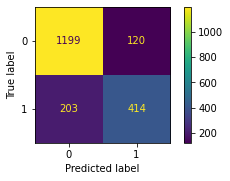

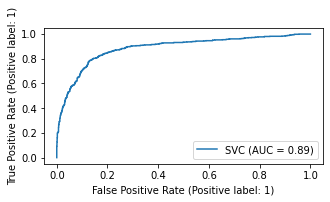

In [80]:
#model evaulation, printing training, testing, accuracy. precision, recall, F1 score ,support=number of sample used
#confusion matrix, check for imbalanced data


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve


svc_train_accuracy = accuracy_score(Y_Train, svc.predict(X_Train))#training accuracy score
svc_test_accuracy = accuracy_score(Y_Test, y_pred)#testing accuracy score
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"SVM classifier Training accuracy : {svc_train_accuracy}")#print Training accuracy
print(f"SVM classifier testing accuracy : {svc_test_accuracy}")#print testing accuracy
print(f"SVM cohen_kappa_score : {cohen_kappa}")


print(confusion_matrix(Y_Test, y_pred))#print confusion matrix
print(classification_report(Y_Test, y_pred))#print summary
plot_confusion_matrix(svc, X_Test,Y_Test)#plot confusion matrix
plot_roc_curve(svc, X_Test,Y_Test)#plot ROC curve

**Appling Random oversampling technique as our outcome is imbalace **

**SVM Model with Oversample**

In [84]:
#importing smote library

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [85]:
## RandomOverSampler is used  to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [86]:
#taking random num
ros = RandomOverSampler(random_state=42)

In [87]:
#fitting training model
X_train_result, y_train_result = ros.fit_resample(X, Y)

In [88]:
#check the shape of the model
#there is increase in the number of data size to balance the over all dataset
X_train_result.shape,y_train_result.shape

((13358, 12), (13358,))

In [89]:
#showing the shape of the dataset before and after the smote, we see the balanced train data now
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_result)))

Original dataset shape Counter({0: 6679, 1: 2998})
Resampled dataset shape Counter({0: 6679, 1: 6679})


In [90]:
#splitting data in train and test
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train_result,y_train_result,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 10686
Length of X Test  : 2672


In [91]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_Train, Y_Train)

y_pred = svc.predict(X_Test)

Training accuracy of Support Vector Classifier is : 0.8261276436458919
Test accuracy of Support Vector Classifier is : 0.8263473053892215
SVM cohen_kappa_score : 0.6526806004401555
[[1115  225]
 [ 239 1093]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1340
           1       0.83      0.82      0.82      1332

    accuracy                           0.83      2672
   macro avg       0.83      0.83      0.83      2672
weighted avg       0.83      0.83      0.83      2672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


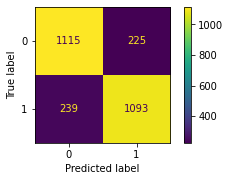

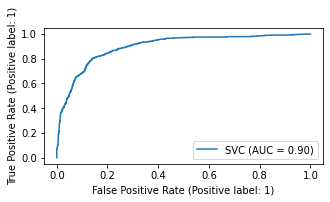

In [93]:
# classification_report accuracy_score  and  confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
svc_train_acc = accuracy_score(Y_Train, svc.predict(X_Train))
svc_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")
print(f"SVM cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(svc, X_Test,Y_Test)
plot_roc_curve(svc, X_Test,Y_Test)

**KNN model**

In [94]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 7741
Length of X Test  : 1936


In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_Train, Y_Train)

y_pred = knn.predict(X_Test)

Training accuracy of KNN is : 0.8341299573698489
Test accuracy of KNN is : 0.8264462809917356
SVM cohen_kappa_score : 0.5823315864562881
[[1201  118]
 [ 218  399]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1319
           1       0.77      0.65      0.70       617

    accuracy                           0.83      1936
   macro avg       0.81      0.78      0.79      1936
weighted avg       0.82      0.83      0.82      1936



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


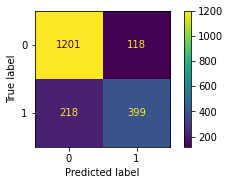

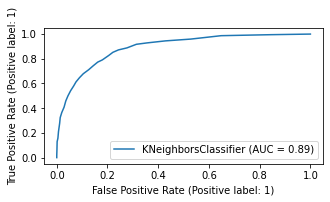

In [96]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, classification_report,plot_confusion_matrix,plot_roc_curve

knn_train_acc = accuracy_score(Y_Train, knn.predict(X_Train))
knn_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")
print(f"SVM cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(knn, X_Test,Y_Test)
plot_roc_curve(knn, X_Test,Y_Test)

**Applying oversampling-KNN**

In [97]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train_result,y_train_result,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 10686
Length of X Test  : 2672


In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_Train, Y_Train)

y_pred = knn.predict(X_Test)

Training accuracy of KNN is : 0.8221972674527419
Test accuracy of KNN is : 0.8196107784431138
SVM cohen_kappa_score : 0.6392393433218448
[[1086  254]
 [ 228 1104]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1340
           1       0.81      0.83      0.82      1332

    accuracy                           0.82      2672
   macro avg       0.82      0.82      0.82      2672
weighted avg       0.82      0.82      0.82      2672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


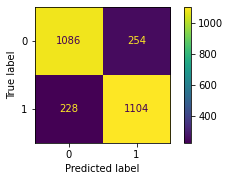

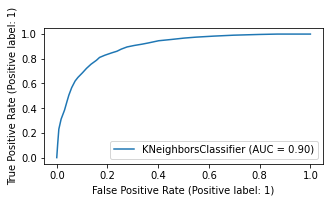

In [99]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, classification_report,plot_confusion_matrix,plot_roc_curve

knn_train_acc = accuracy_score(Y_Train, knn.predict(X_Train))
knn_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")
print(f"SVM cohen_kappa_score : {cohen_kappa}")


print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(knn, X_Test,Y_Test)
plot_roc_curve(knn, X_Test,Y_Test)

**XG boost model**

In [100]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 7741
Length of X Test  : 1936


In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_Train, Y_Train)

y_pred = xgb.predict(X_Test)

Training accuracy of XgBoost is : 0.8309938236945537
Test accuracy of XgBoost is : 0.8342065868263473
SVM cohen_kappa_score : 0.6683960815865495
[[1128  212]
 [ 231 1101]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1340
           1       0.84      0.83      0.83      1332

    accuracy                           0.83      2672
   macro avg       0.83      0.83      0.83      2672
weighted avg       0.83      0.83      0.83      2672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


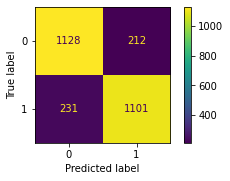

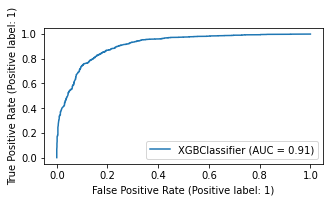

In [105]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(Y_Train, xgb.predict(X_Train))
xgb_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")
print(f"SVM cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(xgb, X_Test,Y_Test)
plot_roc_curve(xgb, X_Test,Y_Test)

**Applying smote to XG Boost**

In [103]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train_result,y_train_result,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 10686
Length of X Test  : 2672


In [104]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_Train, Y_Train)

y_pred = xgb.predict(X_Test)

Training accuracy of XgBoost is : 0.8309938236945537
Test accuracy of XgBoost is : 0.8342065868263473
SVM cohen_kappa_score : 0.6683960815865495
[[1128  212]
 [ 231 1101]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1340
           1       0.84      0.83      0.83      1332

    accuracy                           0.83      2672
   macro avg       0.83      0.83      0.83      2672
weighted avg       0.83      0.83      0.83      2672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


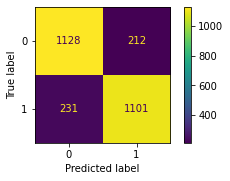

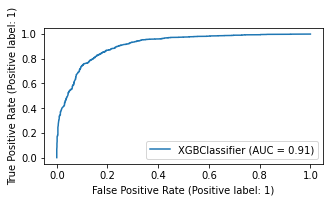

In [106]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(Y_Train, xgb.predict(X_Train))
xgb_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")
print(f"SVM cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(xgb, X_Test,Y_Test)
plot_roc_curve(xgb, X_Test,Y_Test)

In [ ]:
#tuning

**Tuning the best outcome result XGBOOST**

In [107]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_Train, Y_Train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [108]:
# best estimator 

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_Test)

Training accuracy of XgBoost is : 0.9327157027886955
Test accuracy of XgBoost is : 0.8817365269461078
SVM cohen_kappa_score : 0.7635101525003697
[[1145  195]
 [ 121 1211]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1340
           1       0.86      0.91      0.88      1332

    accuracy                           0.88      2672
   macro avg       0.88      0.88      0.88      2672
weighted avg       0.88      0.88      0.88      2672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


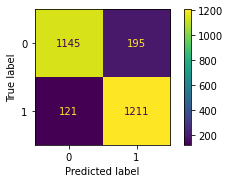

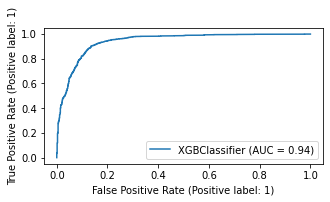

In [109]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(Y_Train, xgb.predict(X_Train))
xgb_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")
print(f"XGB cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(xgb, X_Test,Y_Test)
plot_roc_curve(xgb, X_Test,Y_Test)

**RandomForestClassifier**

In [110]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=0 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 7741
Length of X Test  : 1936


In [111]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_Train, Y_Train)

y_pred = rand_clf.predict(X_Test)

Training accuracy of Random Forest is : 0.8763725616845369
Test accuracy of Random Forest is : 0.8403925619834711
RF cohen_kappa_score : 0.6125943866647671
[[1221  121]
 [ 188  406]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1342
           1       0.77      0.68      0.72       594

    accuracy                           0.84      1936
   macro avg       0.82      0.80      0.81      1936
weighted avg       0.84      0.84      0.84      1936



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


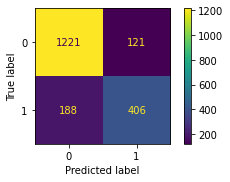

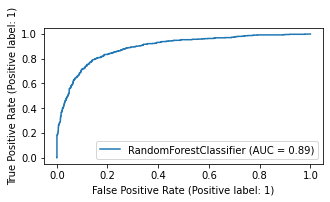

In [113]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve

rand_clf_train_acc = accuracy_score(Y_Train, rand_clf.predict(X_Train))
rand_clf_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))

print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(rand_clf, X_Test,Y_Test)
plot_roc_curve(rand_clf, X_Test,Y_Test)

In [ ]:
#applying smote

**Apply Randomoversampling for RFC**

In [114]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train_result,y_train_result,test_size = 0.2,  random_state=0 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 10686
Length of X Test  : 2672


In [115]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_Train, Y_Train)

y_pred = rand_clf.predict(X_Test)

Training accuracy of Random Forest is : 0.8740408010481003
Test accuracy of Random Forest is : 0.8525449101796407
RF cohen_kappa_score : 0.704767775185942
[[1093  210]
 [ 184 1185]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1303
           1       0.85      0.87      0.86      1369

    accuracy                           0.85      2672
   macro avg       0.85      0.85      0.85      2672
weighted avg       0.85      0.85      0.85      2672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


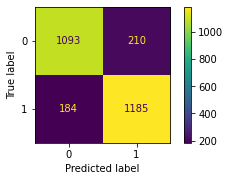

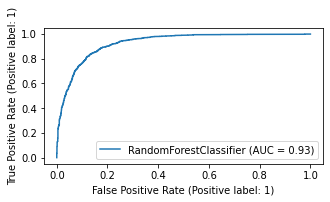

In [116]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve

rand_clf_train_acc = accuracy_score(Y_Train, rand_clf.predict(X_Train))
rand_clf_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))

print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(rand_clf, X_Test,Y_Test)
plot_roc_curve(rand_clf, X_Test,Y_Test)

**END OF THE CODE**